In [1]:
%matplotlib inline

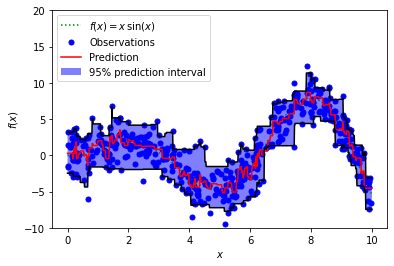

In [152]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor

np.random.seed(1)


def f(x):
    """The function to predict."""
    return x * np.sin(x)

#----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d(np.random.uniform(0, 10.0, size=500)).T
X = X.astype(np.float32)

# Observations
y = f(X).ravel()

dy = 1.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise
y = y.astype(np.float32)

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
xx = np.atleast_2d(np.linspace(0, 10, 1000)).T
xx = xx.astype(np.float32)

alpha = .95

clf = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

clf.fit(X, y)
# Make the prediction on the meshed x-axis
y_upper = clf.predict(xx)


clf.set_params(alpha=1.0 - alpha)
clf.fit(X, y)
# Make the prediction on the meshed x-axis
y_lower = clf.predict(xx)


clf.set_params(loss='ls')
clf.fit(X, y)
# Make the prediction on the meshed x-axis
y_pred = clf.predict(xx)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure()
plt.plot(xx, f(xx), 'g:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'b.', markersize=10, label=u'Observations')
plt.plot(xx, y_pred, 'r-', label=u'Prediction')
plt.plot(xx, y_upper, 'k-')
plt.plot(xx, y_lower, 'k-')
plt.fill(np.concatenate([xx, xx[::-1]]),
         np.concatenate([y_upper, y_lower[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% prediction interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')
plt.show()

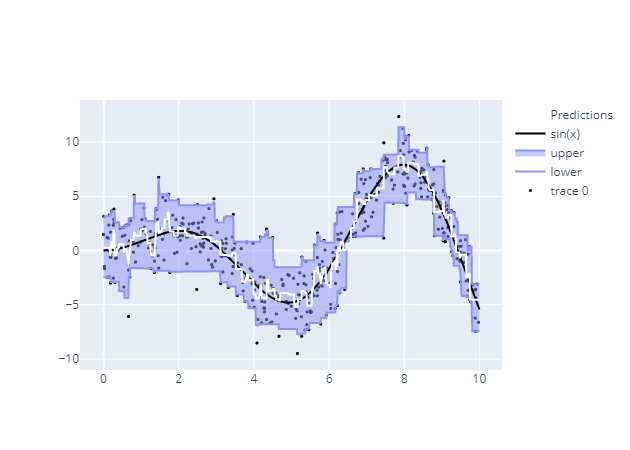

In [141]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=X.reshape(-1), y=y, mode ='markers',
                         marker=dict(size=3, color = '#000000')))

fig.add_trace(go.Scatter(x=xx.reshape(-1), y= y_lower, name ='lower', 
                        line_color="#8c94f5"))
fig.add_trace(go.Scatter(x=xx.reshape(-1), y= y_upper,  fill = 'tonexty', name ='upper',
                        line_color="#8c94f5"))

fig.add_trace(go.Scatter(x=xx.reshape(-1), y=f(xx).reshape(1000), mode = 'lines', name ='sin(x)',
                        line_color = "#000000"))

fig.add_trace(go.Scatter(x=xx.reshape(-1), y=y_pred, mode = 'lines', name ='Predictions',
                        line_color = "#FFFFFF"))



# Plotly renders the entire Primary Delay meshgrid in one frame, since the add_trace doesn't add each PD value as an animation frame.

In [ ]:

print('Making trend graph...')
import plotly.express as px
import plotly.graph_objects as go
ffmax = 2579000
plannedmax  = 24100
#labelname = 'On Time WTT%'
trendx = df[['Primary Delay per 100 miles','Footfall','Planned']]
trendy = df[labelname]

trendmodel = GradientBoostingRegressor(verbose = 0, n_estimators=1000)
alpha = 0.3
uppermodel = GradientBoostingRegressor(verbose = 0, loss='quantile', alpha = alpha, n_estimators=70)
lowermodel = GradientBoostingRegressor(verbose = 0, loss='quantile', alpha = 1-alpha, n_estimators=70)

trendmodel.fit(trendx.values, trendy.values)
uppermodel.fit(trendx.values, trendy.values)
lowermodel.fit(trendx.values, trendy.values)

mesh = np.mgrid[0:0.1:0.2, 1945314:1945314*1+1:1945314*1, 8000:24001:200].reshape(3, -1).T
#mesh = np.mgrid[0:5:0.2, ffmax*.1:ffmax*1+1:ffmax*.1, 8000:24001:200].reshape(3, -1).T
#mesh2 = np.mgrid[0:5:0.2, ffmax*.7:ffmax*.9+1:ffmax*.1, 8000:23001:300].reshape(3, -1).T
#mesh = np.concatenate((mesh,mesh2))
trendpred = trendmodel.predict(mesh)
upperpred = uppermodel.predict(mesh)
lowerpred = lowermodel.predict(mesh)

trenddf = pd.DataFrame(mesh, columns = trendx.columns)
trenddf[labelname] = trendpred*100
trenddf['Upper bound'] = upperpred*100
trenddf['Lower bound'] = lowerpred*100

trenddf['Footfall'] = trenddf['Footfall']*100/ffmax
trenddf['Footfall'] = trenddf['Footfall'].astype(int)
trenddf['Footfall'] = trenddf['Footfall'].astype(str)
trenddf['Footfall'] = trenddf['Footfall'] + '%'


if labelname == 'PPM%':
    range_y = [40,100]
else:
    range_y = [40,90]

fig = px.scatter(trenddf, x="Planned", y=labelname, animation_frame='Primary Delay per 100 miles', color="Footfall", trendline="lowess",
                  width = 1000, height = 700, range_x=[7000,25000], range_y = range_y )
fig.add_trace(go.Scatter(x = trenddf['Planned'], y = trenddf['Upper bound'], mode = 'markers'))
fig.add_trace(go.Scatter(x = trenddf['Planned'], y = trenddf['Lower bound'], mode = 'markers'))

fig["layout"].pop("updatemenus") # optional, drop animation buttons
#fig.update_traces(marker=dict(size=5))
fig.show()

